In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

# load in data
cbb = pd.read_csv("cbb.csv")
cbb2020 = pd.read_csv("cbb20.csv")

#Dependent variable (wins)
Y = cbb[['W']]
#Independent variables
X = cbb[['ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR','FTRD','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB']]
x_vars = list(X.columns.values)

#linear regression
cbb_reg = LinearRegression()
cbb_reg.fit(X, Y)

#Variables and coefficients of wins
coefficients = pd.concat([pd.DataFrame({'Variable':X.columns}),pd.DataFrame(np.transpose(cbb_reg.coef_))], axis = 1)
coef_sum = coefficients.rename(columns={0:'Coefficient'}) # make new df after renaming coefficient column
coef_sum

,Variable,Coefficient
0,ADJOE,-0.184692
1,ADJDE,0.349388
2,BARTHAG,-2.871174
3,EFG_O,1.107144
4,EFG_D,-0.995670
5,TOR,-0.488813
6,TORD,0.760188
7,ORB,0.212232
8,DRB,-0.422526
9,FTR,0.023990


In [25]:
from sklearn.model_selection import train_test_split

X_regressor1 = cbb[['ADJDE']]
X_regressor2 = cbb[['EFG_O']]
X_regressor3 = cbb[['TORD']]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_regressor1, Y, test_size=0.25, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_regressor2, Y, test_size=0.25, random_state=42)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_regressor3, Y, test_size=0.25, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train1.values.reshape(-1,1), y_train1.values.ravel())

model2 = LogisticRegression()
model2.fit(X_train2.values.reshape(-1,1), y_train2.values.ravel())

model3 = LogisticRegression()
model3.fit(X_train3.values.reshape(-1,1), y_train3.values.ravel())

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
pred1 = model.predict(X_test1.values.reshape(-1,1))
pred2 = model.predict(X_test2.values.reshape(-1,1))
pred3 = model.predict(X_test3.values.reshape(-1,1))

print(pred1)
print(pred2)
print(pred3)

[16 20 14 20 11 16 20 20 14 14 14 14 14 11 14 16 14 14 14 14 20 14 20 16
 14 14 20 16 16 14 20 14 14 11 11 11 20 20 16 20 14 14 14 14 14 11 16 20
 11 14 14 14 11 20 20 14 20 16 14 14 20 14 16 20 20 14 14 11 16 11 14 20
 14 14 14 20 14 16 16 20 20 16 14 14 20 14 20 11 11 11 16 20 20 11 14 11
 11 14 14 11 14 14 11 14 14 20 14 14 14 11 20 16 16 14 14 14 20 14 14 11
 11 14 16 14 11 20 11 14 20 14 16 14 11 20 20 20 16 14 11 14 14 20 11 14
 14 14 14 20 20 14 16 14 20 14 16 14 20 11 14 20 11 14 16 16 11 20 11 14
 20 11 11 16 20 16 14 16 16 14 14 14 20 14 14 14 14 14 14 20 16 14 11 20
 14 14 16 14 14 14 20 20 14 11 16 14 20 14 14 14 14 11 11 14 11 20 14 14
 14 20 14 20 14 20 16 16 16 14 20 14 14 14 14 14 16 16 11 20 20 20 11 11
 11 16 14 14 16 14 14 14 14 14 14 16 11 14 16 14 11 14 14 11 20 16 11 11
 20 14 14 14 14 14 20 11 14 14 14 16 14 14 20 14 14 16 11 11 14 16 14 16
 20 11 20 20 20 14 14 14 20 14 20 16 16 14 14 11 14 20 20 14 11 16 20 20
 11 14 11 16 11 16 11 20 20 20 14 14 14 20 20 14 20

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


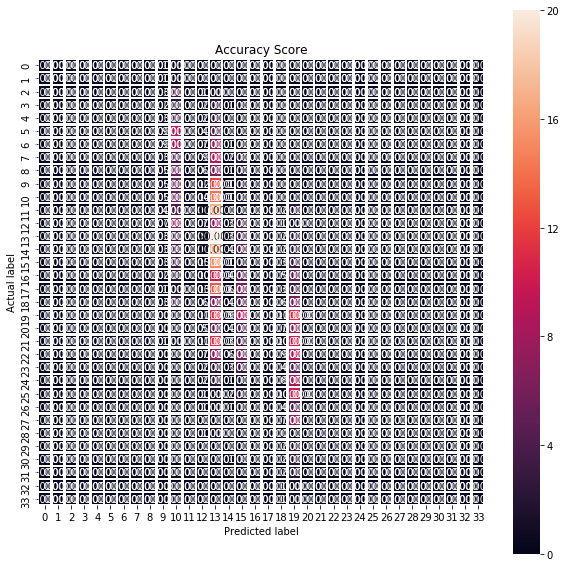

In [42]:
from sklearn import metrics

cm1 = metrics.confusion_matrix(y_test1, pred1)
print(cm1)
cm2 = metrics.confusion_matrix(y_test2, pred2)
print(cm2)
cm3 = metrics.confusion_matrix(y_test3, pred3)
print(cm3)

#Adjusted defensive efficiency vs. wins heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=1.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score');

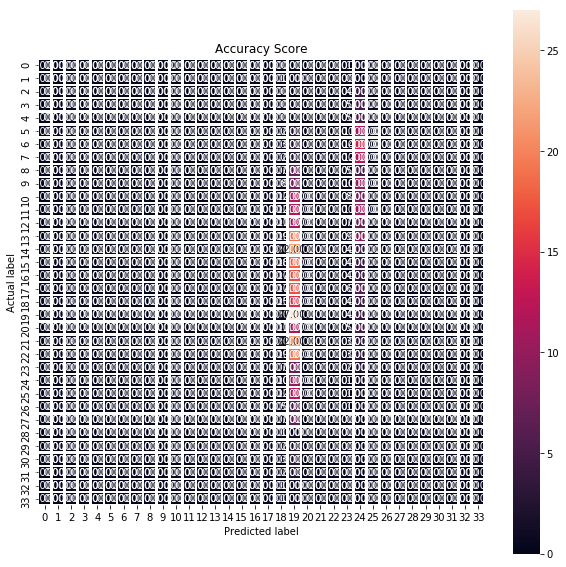

In [43]:
#Efficient field goal percentage vs wins heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=1.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score');

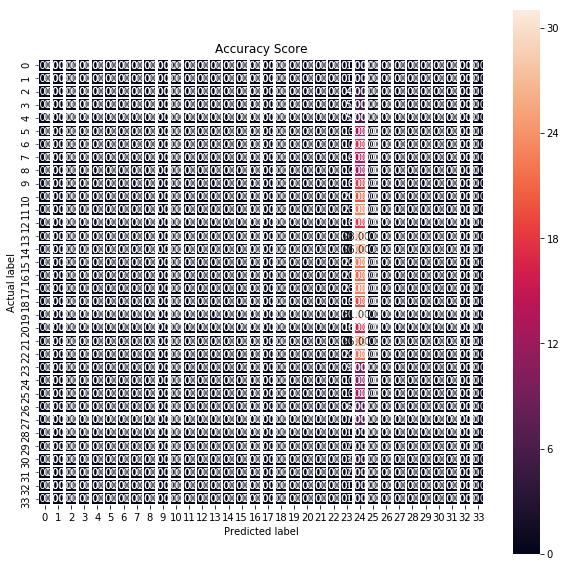

In [44]:
#Turnover defense vs wins heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cm3, annot=True, fmt=".3f", linewidths=1.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score');

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Text(27.125,0.5,'Efficient FG %')

<Figure size 864x576 with 0 Axes>

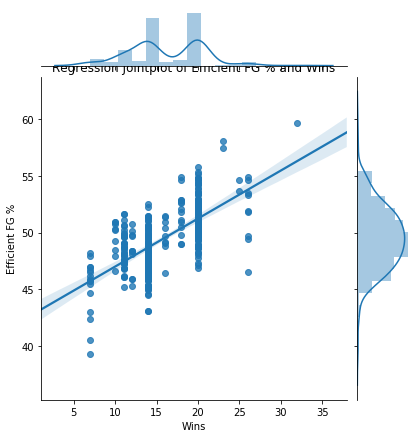

In [46]:
from sklearn.metrics import accuracy_score

#Train and test data
y_train = cbb[['ADJDE','EFG_O','TORD']]
X_train = cbb[['W']]
y_test = cbb2020[['ADJDE','EFG_O','TORD']]
X_test = cbb2020[['W']]

#Regression data to train the data
regression = LogisticRegression().fit(y_train, X_train)
predict_wins = regression.predict(y_test)
accuracy = accuracy_score(X_test, predict_wins)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.jointplot(predict_wins,cbb2020['EFG_O'], kind='reg')
plt.title('Regression Jointplot of Efficient FG % and Wins')
plt.xlabel('Wins')
plt.ylabel('Efficient FG %')

Text(27.125,0.5,'Adjusted Defensive Efficiency')

<Figure size 864x576 with 0 Axes>

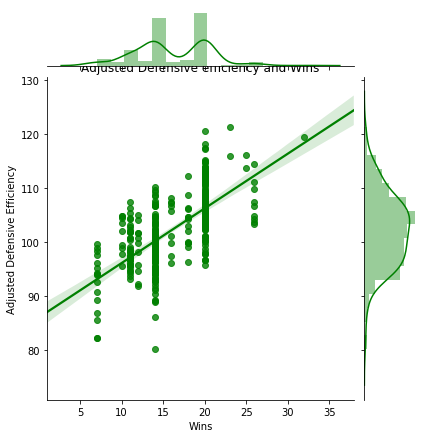

In [50]:
plt.figure(figsize=(12,8))
sns.jointplot(predict_wins,cbb2020['ADJOE'], kind='reg', color = 'green')
plt.title('Adjusted Defensive efficiency and Wins')
plt.xlabel('Wins')
plt.ylabel('Adjusted Defensive Efficiency')

Text(27.125,0.5,'Turnover percentage Committed')

<Figure size 864x576 with 0 Axes>

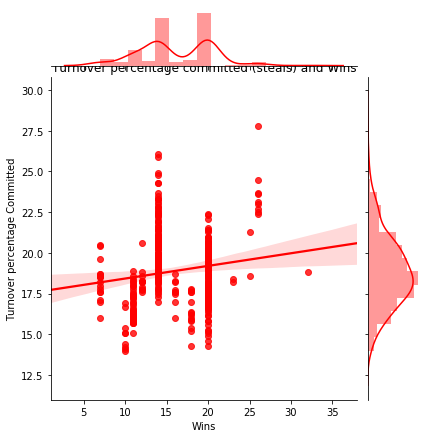

In [51]:
plt.figure(figsize=(12,8))
sns.jointplot(predict_wins,cbb2020['TORD'], kind='reg', color = 'red')
plt.title('Turnover percentage committed (steals) and Wins')
plt.xlabel('Wins')
plt.ylabel('Turnover percentage Committed')